## Importing the modules & libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.preprocessing import LabelEncoder

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Reading the dataset

In [3]:
df = pd.read_csv('water.csv')

In [4]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

### Removing the index column

In [5]:
df = df.drop(['Index'], axis=1)

### Viewing dataset information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   object 
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  object 
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Month                   object 
 20  Day                     float64
 21  Time of Day             float64

In [7]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,5.777951e+06,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,1.069586e+00,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,8.921019e-01,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,2.654286e+00,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [8]:
df.shape

(5956842, 23)

### Checking the numbers of null or NaN entries (feature-wise)

In [9]:
df.isnull().sum()

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

## Dealing with the null or NaN entries

In [10]:
df = df.fillna(np.nan)

### Analyzing the numbers of unique entries (feature-wise)

In [11]:
for each in df.columns:
    uniques = df[each].unique()
    print(f'{each}: {len(uniques)}')

pH: 5604785
Iron: 5674877
Nitrate: 5614446
Chloride: 5549790
Lead: 5542384
Zinc: 5567923
Color: 6
Turbidity: 5665515
Fluoride: 5537537
Copper: 5528121
Odor: 5547050
Sulfate: 5529950
Conductivity: 5560633
Chlorine: 5658154
Manganese: 5610686
Total Dissolved Solids: 5709788
Source: 9
Water Temperature: 5556717
Air Temperature: 5684020
Month: 13
Day: 32
Time of Day: 25
Target: 2


In [12]:
for each in df.columns:
    uniques = df[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: {uniques}')

Color: ['Colorless' 'Faint Yellow' 'Light Yellow' 'Near Colorless' 'Yellow' nan]
Source: [nan 'Lake' 'River' 'Ground' 'Spring' 'Stream' 'Aquifer' 'Reservoir'
 'Well']
Month: ['January' 'November' 'April' 'June' 'March' 'September' 'May' 'July'
 'August' 'October' 'December' 'February' nan]
Day: [29. 26. 31.  1. 18. 14. 11.  5.  7.  3. 13. 19. 28. 17. 20. 16. 15. 21.
 23.  9.  2.  8. 12. 30. 24. 10.  4. 27. nan 25.  6. 22.]
Time of Day: [ 4. 16.  8. 21.  7. 13. 14. 12.  9. 23. 22.  0.  5. 11. 10. 17.  6. 18.
 15.  3.  2. 19. 20.  1. nan]
Target: [0 1]


In [13]:
for each in df.columns:
    uniques = df[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: ', end="")
        for unique in uniques:
            if pd.isna(unique):
                print(f'({unique}:{len(df[pd.isna(df[each])])})', end=",")
            else:
                print(f'({unique}:{len(df[df[each]==unique])})', end=",")
        print()

Color: (Colorless:1787911),(Faint Yellow:1079772),(Light Yellow:758138),(Near Colorless:1786234),(Yellow:539048),(nan:5739),
Source: (nan:88262),(Lake:732618),(River:732980),(Ground:734389),(Spring:732700),(Stream:734502),(Aquifer:733778),(Reservoir:733298),(Well:734315),
Month: (January:497875),(November:481020),(April:482261),(June:482016),(March:498700),(September:481456),(May:498043),(July:498132),(August:497072),(October:496061),(December:497349),(February:451189),(nan:95668),
Day: (29.0:176604),(26.0:192155),(31.0:113143),(1.0:191547),(18.0:192521),(14.0:192093),(11.0:192799),(5.0:192605),(7.0:192404),(3.0:191478),(13.0:192646),(19.0:193567),(28.0:192917),(17.0:192393),(20.0:192929),(16.0:191948),(15.0:192793),(21.0:192490),(23.0:192624),(9.0:192704),(2.0:192166),(8.0:192331),(12.0:192977),(30.0:176601),(24.0:192522),(10.0:192593),(4.0:192229),(27.0:193048),(nan:99603),(25.0:192676),(6.0:192455),(22.0:193281),
Time of Day: (4.0:242826),(16.0:243838),(8.0:242723),(21.0:242790),(7.

In [14]:
for each in df.columns:
    uniques = df[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: ', end="")
        for unique in uniques:
            if pd.isna(unique):
                print(f'({unique}:{len(df[pd.isna(df[each])])/df.shape[0]*100})', end=",")
            else:
                print(f'({unique}:{len(df[df[each]==unique])/df.shape[0]*100})', end=",")
        print()

Color: (Colorless:30.014410320099138),(Faint Yellow:18.126584522470125),(Light Yellow:12.727179938631913),(Near Colorless:29.986257819159885),(Yellow:9.049224404474721),(nan:0.09634299516421621),
Source: (nan:1.481691137686714),(Lake:12.298765016765595),(River:12.304842062287365),(Ground:12.328495535050283),(Spring:12.300141585088205),(Stream:12.330392513348515),(Aquifer:12.318238422304972),(Reservoir:12.310180461392127),(Well:12.32725326607622),
Month: (January:8.358036019756778),(November:8.075084079785901),(April:8.09591726622932),(June:8.091804348680055),(March:8.371885640075732),(September:8.082403394281735),(May:8.360856306076274),(July:8.362350386328863),(August:8.344555722646328),(October:8.327583642473646),(December:8.349205837589784),(February:7.574298596471084),(nan:1.606018759604502),
Day: (29.0:2.9647252688589023),(26.0:3.2257864150165476),(31.0:1.899378899087805),(1.0:3.2155796645269423),(18.0:3.2319306102125926),(14.0:3.224745595065305),(11.0:3.2365975125746163),(5.0:3.2

In [15]:
nandict = dict(df.isnull().sum())
for each in nandict:
    nandict[each] = nandict[each]/df.shape[0]*100
nandict

{'pH': 1.9482470745405032,
 'Iron': 0.6673502503507731,
 'Nitrate': 1.7748498281471963,
 'Chloride': 2.9467123687349774,
 'Lead': 0.45173264625786613,
 'Zinc': 2.6209525114146053,
 'Color': 0.09634299516421621,
 'Turbidity': 0.8362652559863095,
 'Fluoride': 3.1754409467298275,
 'Copper': 3.3474448373819548,
 'Odor': 3.0031180951249,
 'Sulfate': 3.3141385989421916,
 'Conductivity': 2.7508031940414064,
 'Chlorine': 0.9707324787194289,
 'Manganese': 1.8396156889841968,
 'Total Dissolved Solids': 0.028034989009277065,
 'Source': 1.481691137686714,
 'Water Temperature': 2.8241977880225795,
 'Air Temperature': 0.4990563792022686,
 'Month': 1.606018759604502,
 'Day': 1.6720772516712716,
 'Time of Day': 1.9224783870379643,
 'Target': 0.0}

### Checking dataset size on simply removing all the null value containing row entries

In [16]:
df.dropna(axis=0)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
4,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
7,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,Colorless,0.047803,1.016196,0.298093,...,2.325094,6.020680e-16,214.553104,River,15.891905,61.139140,April,11.0,4.0,0
9,7.100650,3.019038e-03,3.620641,157.043934,6.459725e-148,0.112994,Colorless,0.050613,0.842107,0.391602,...,2.284971,8.840612e-07,113.909077,River,11.899376,14.010268,April,7.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956834,7.336513,7.989439e-04,3.807672,89.956213,4.258296e-34,3.027267,Faint Yellow,0.010288,0.745372,0.186357,...,2.553024,1.428103e-02,1.634232,Lake,18.610969,82.445237,January,27.0,11.0,1
5956835,8.161283,1.468137e-05,6.552120,309.134213,3.368973e-44,2.127818,Light Yellow,0.201469,3.419696,3.170538,...,3.180415,7.086033e-04,19.767936,Stream,26.160882,45.900772,May,26.0,4.0,1
5956837,8.418457,9.517522e-05,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,7.950573,2.157286e-01,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1


## Plotting the Correlation Heatmap

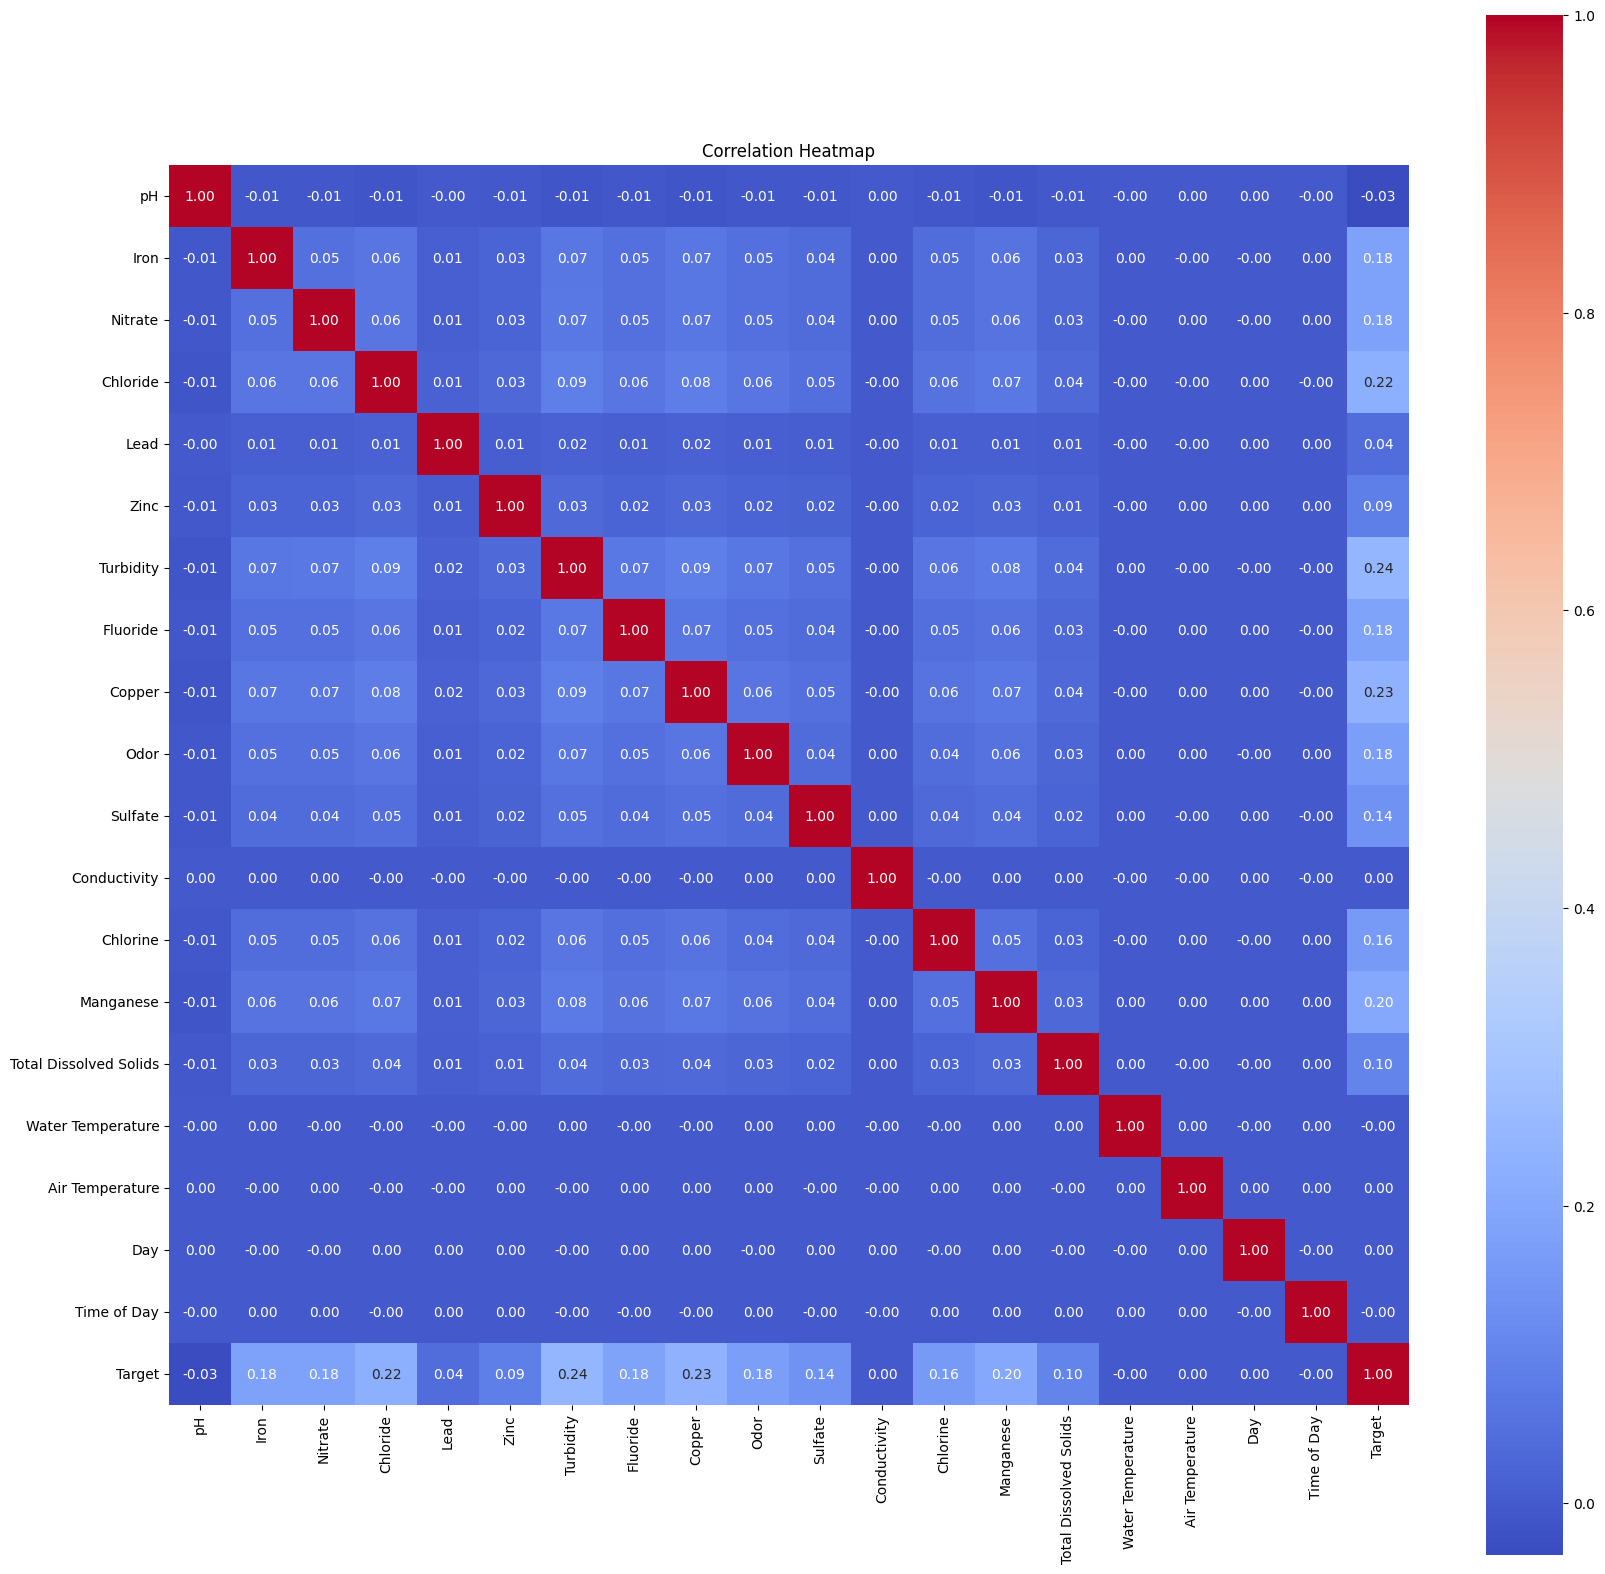

In [17]:
# fig = plt.figure(figsize=(20,20))
# sns.heatmap(df.dropna(axis=0).corr(numeric_only=True), annot=True)
# plt.show()

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

## Plotting the histogram for each dataset feature

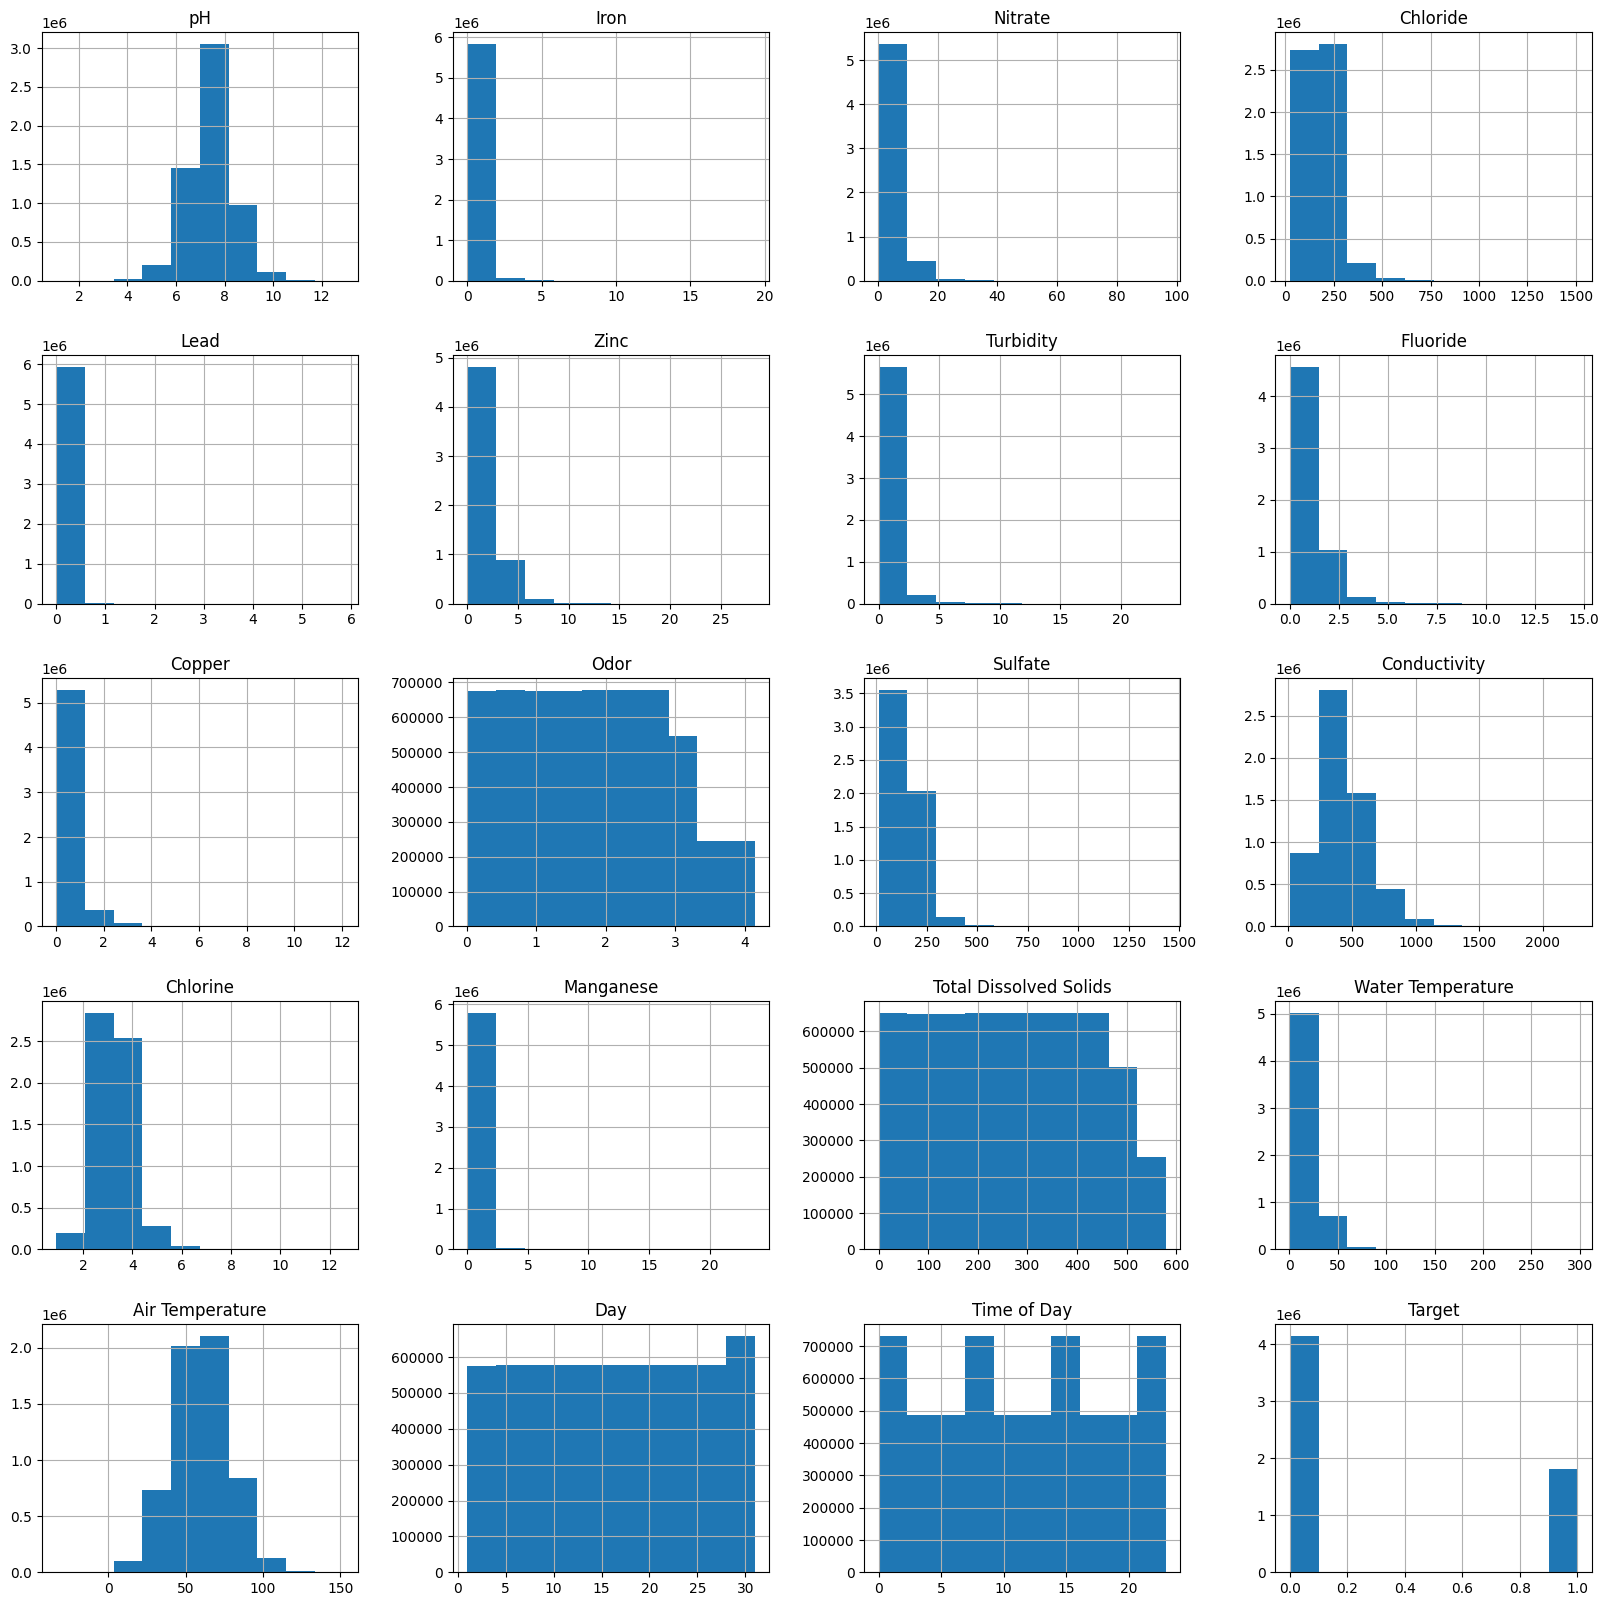

In [18]:
df.hist(figsize=(20,20))
plt.show()

## Plotting the distribution of each feature w.r.t. the target labels

In [19]:
encoded_df = df.copy()

label_encoder = LabelEncoder()
encoded_df['Color'] = label_encoder.fit_transform(encoded_df['Color'])
encoded_df['Source'] = label_encoder.fit_transform(encoded_df['Source'])
encoded_df['Month'] = label_encoder.fit_transform(encoded_df['Month'])

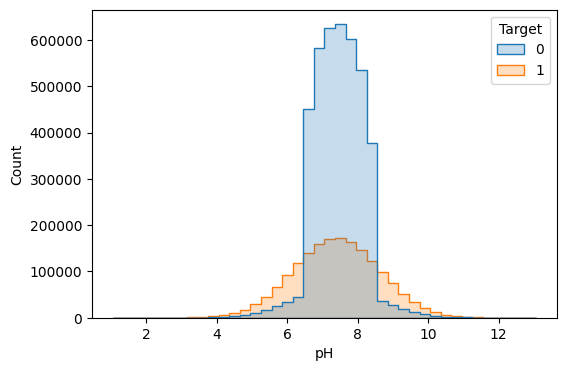

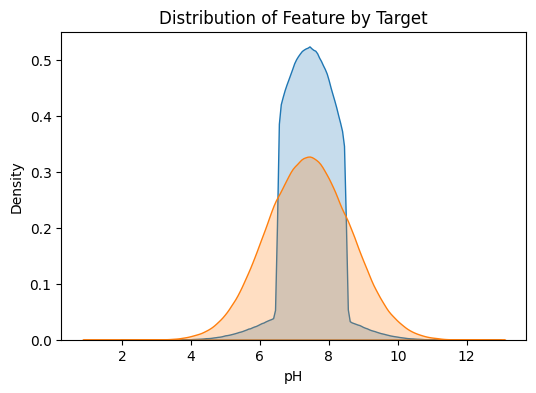

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


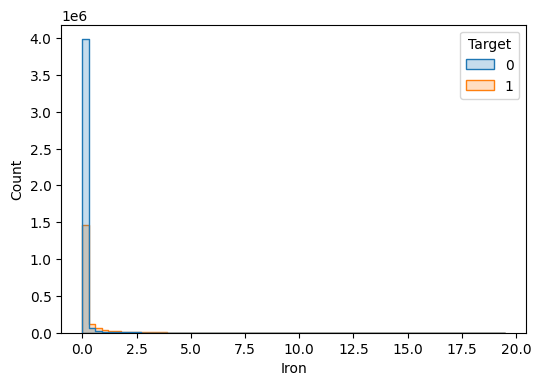

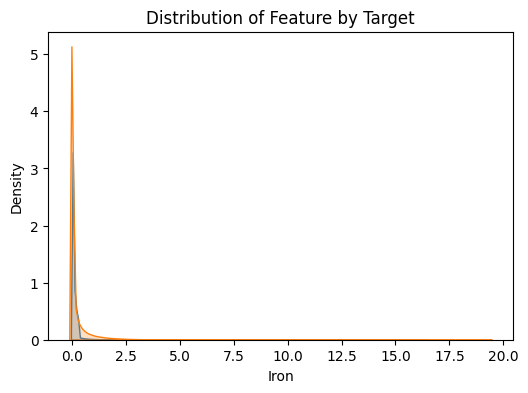

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


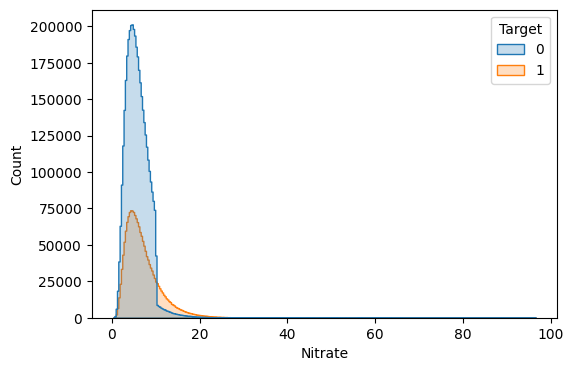

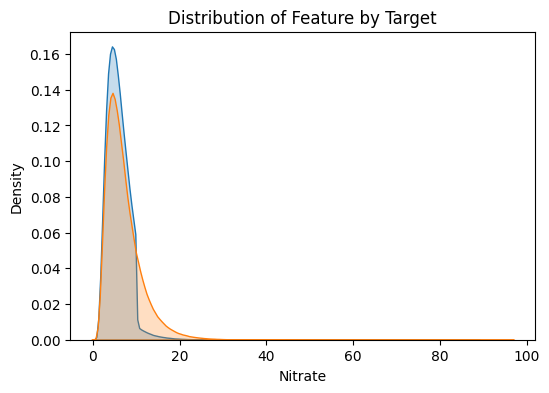

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


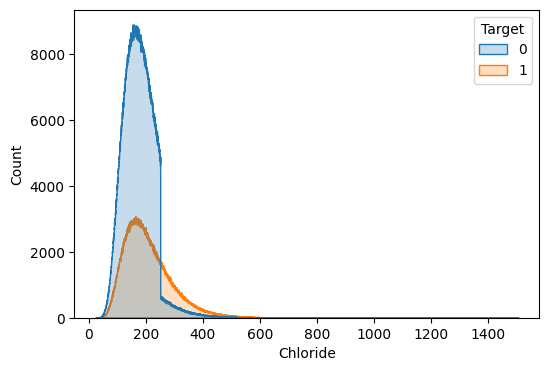

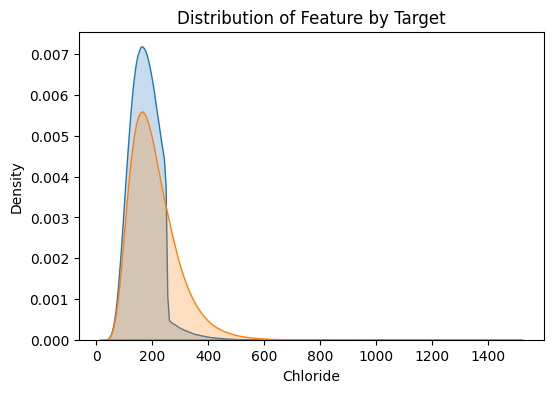

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


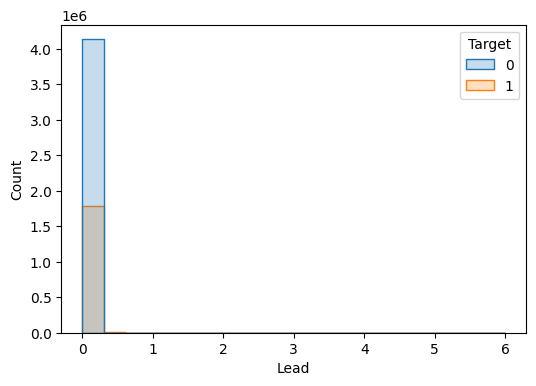

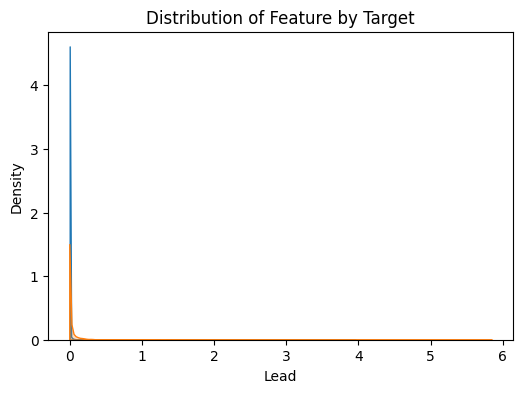

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


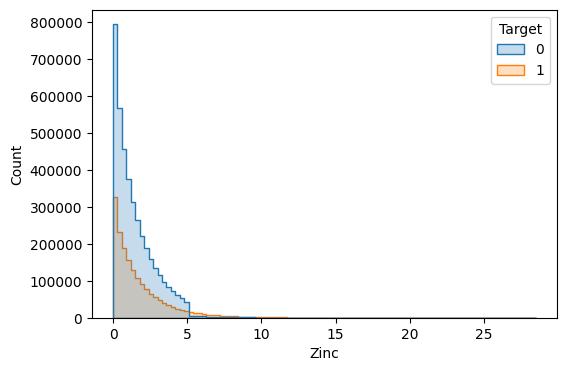

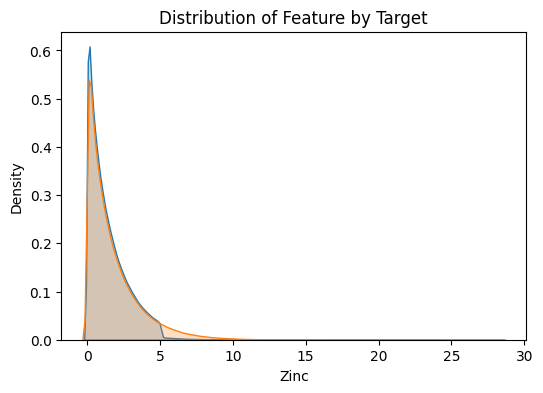

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


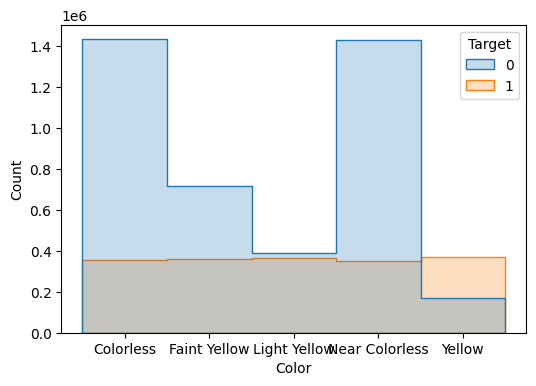

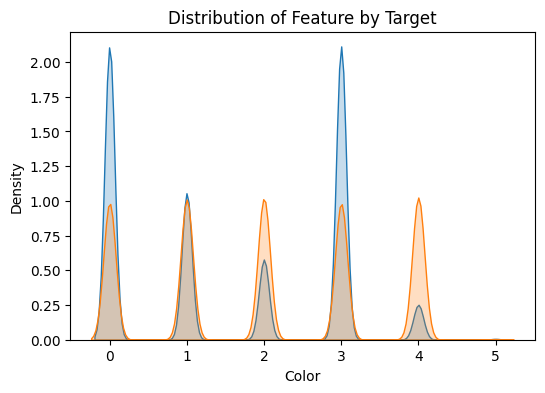

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


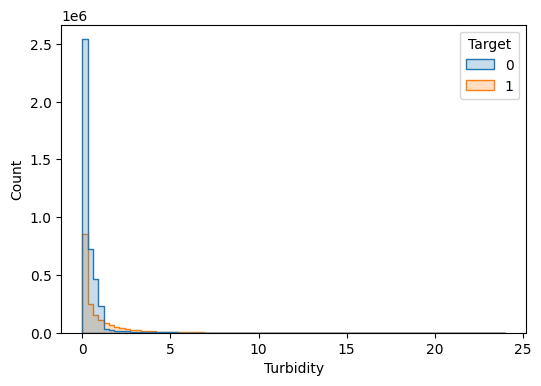

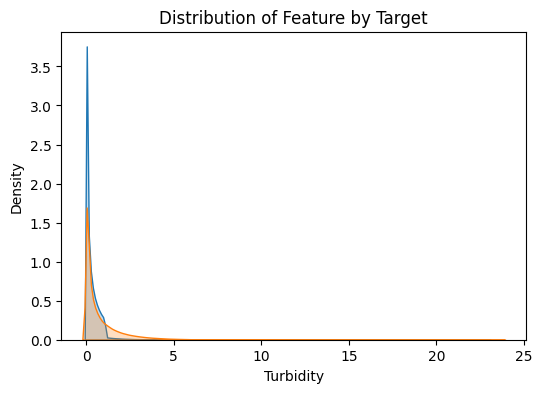

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


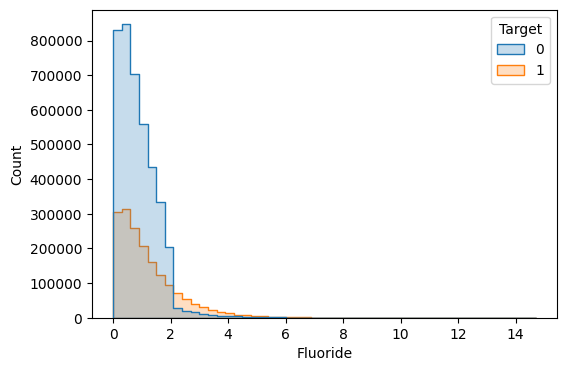

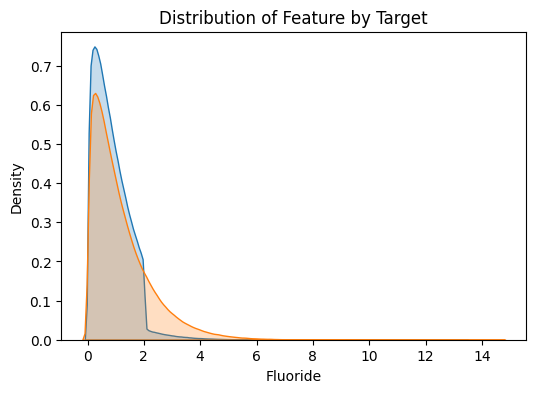

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


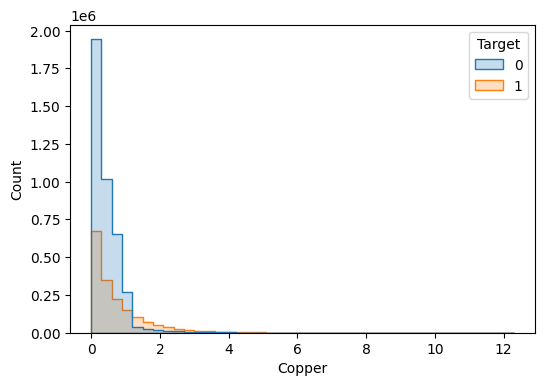

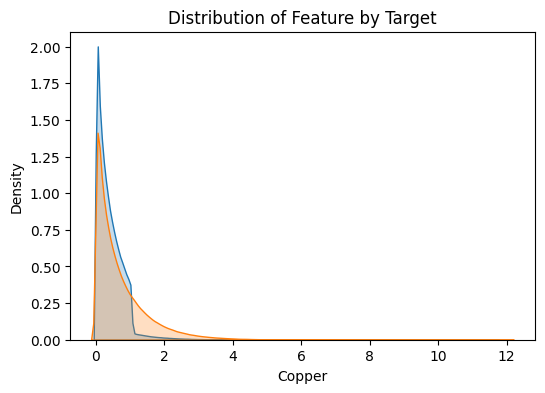

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


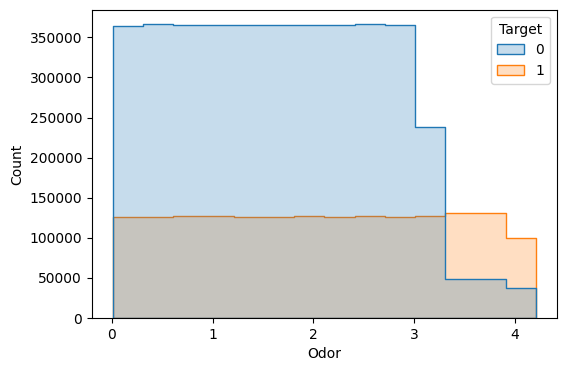

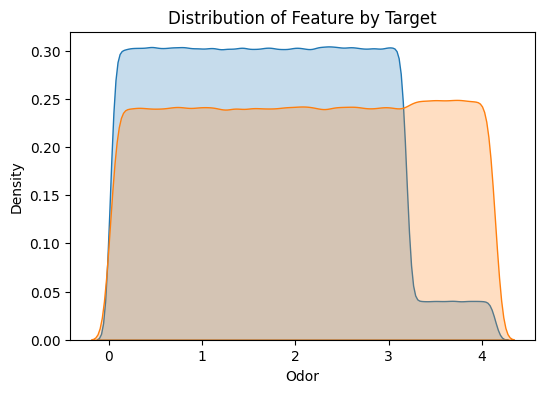

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


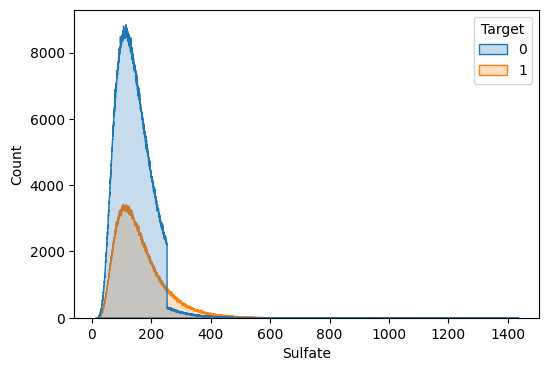

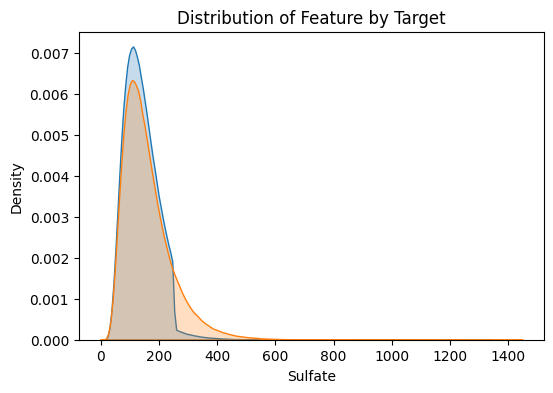

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


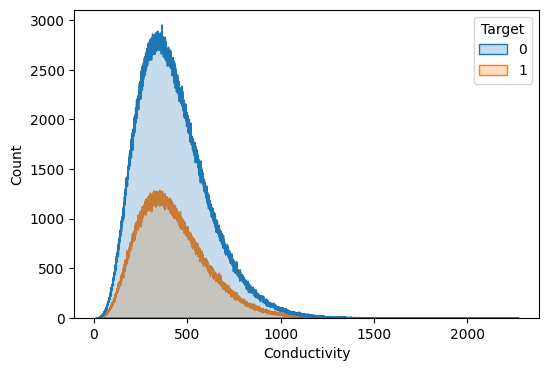

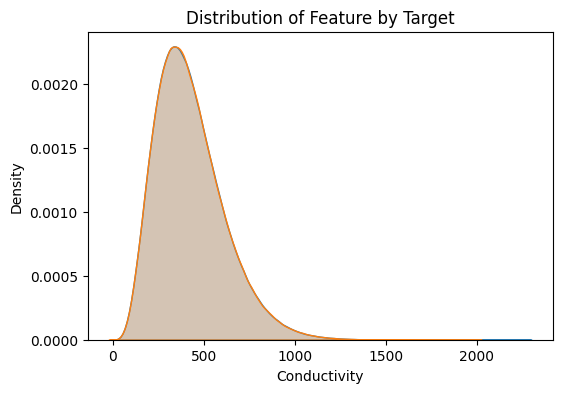

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


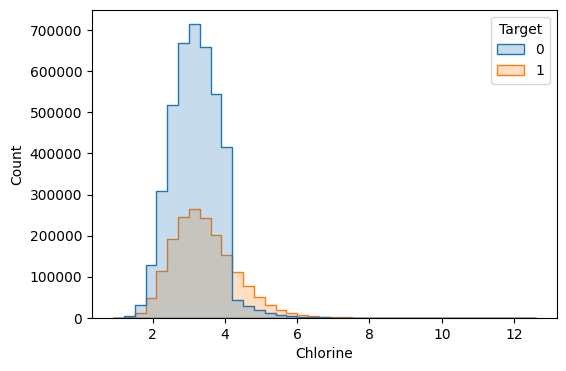

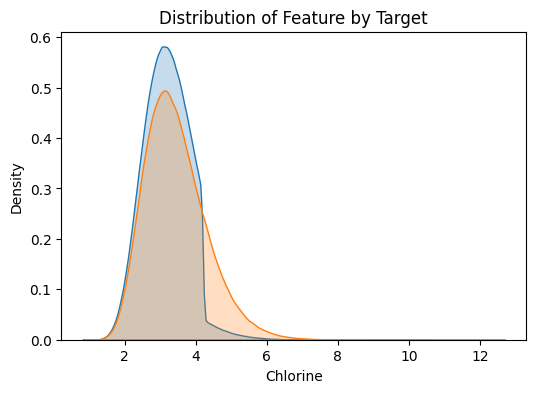

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


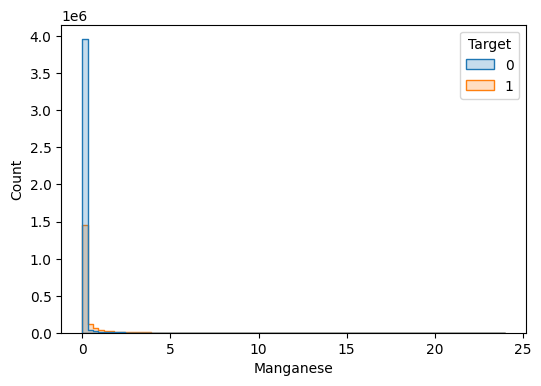

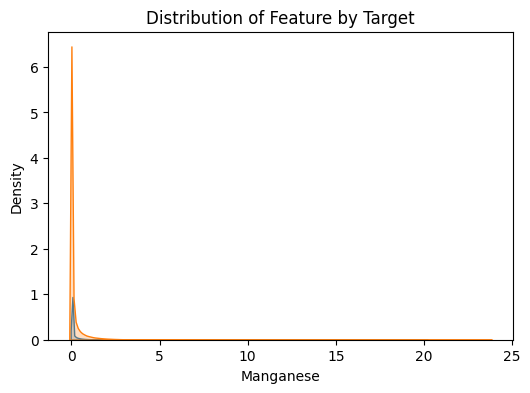

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


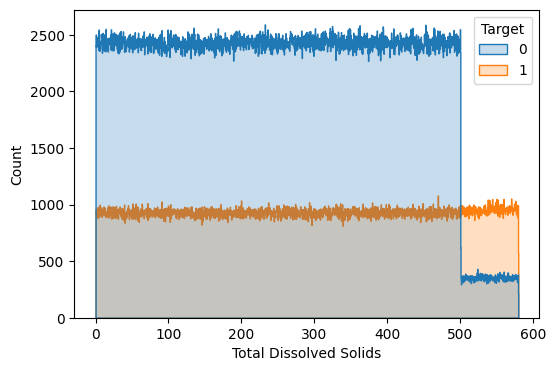

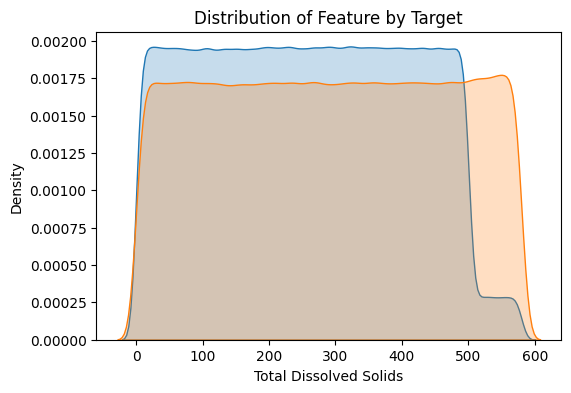

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


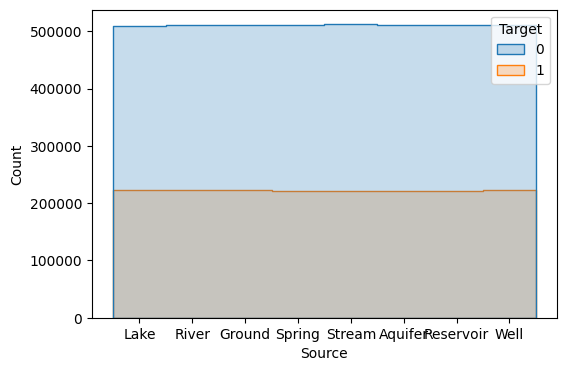

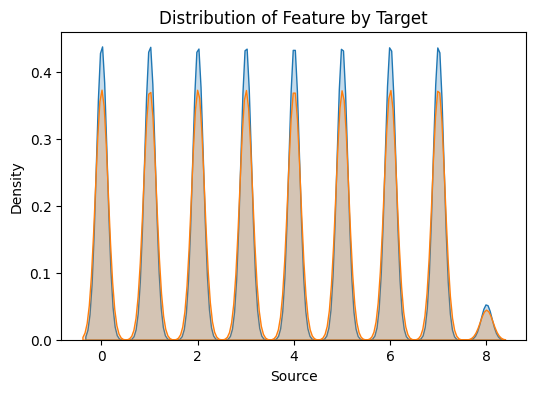

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


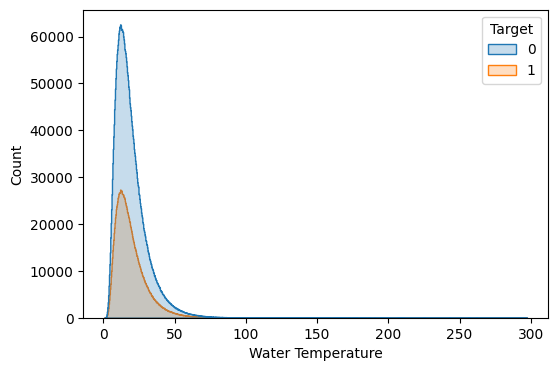

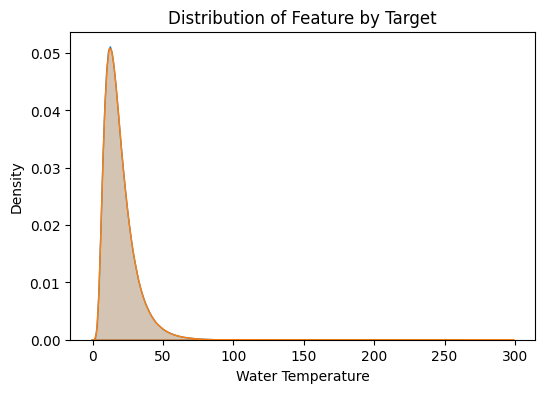

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


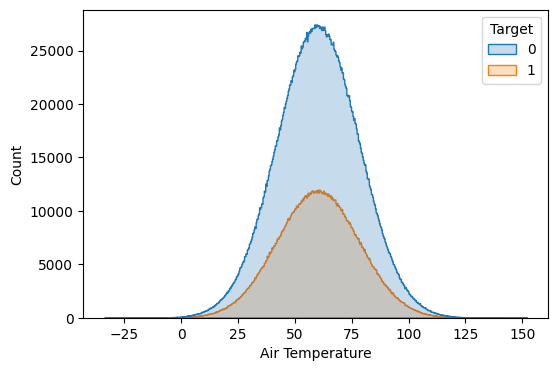

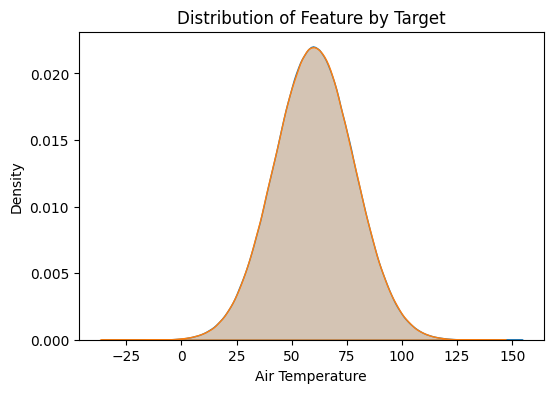

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


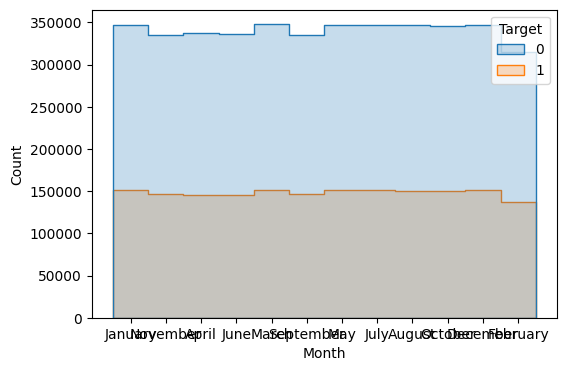

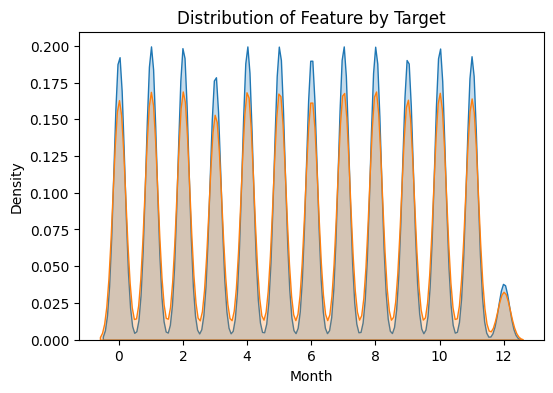

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


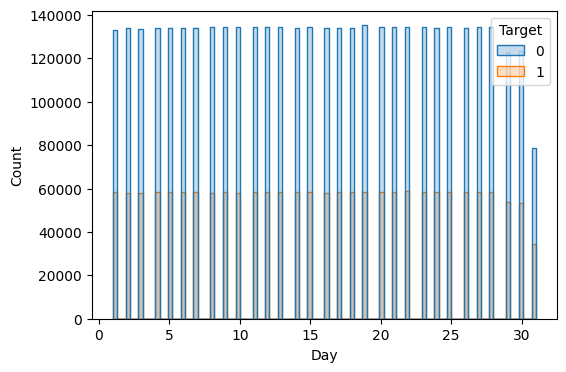

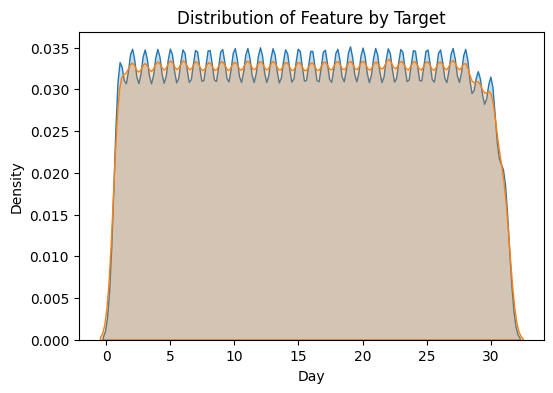

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


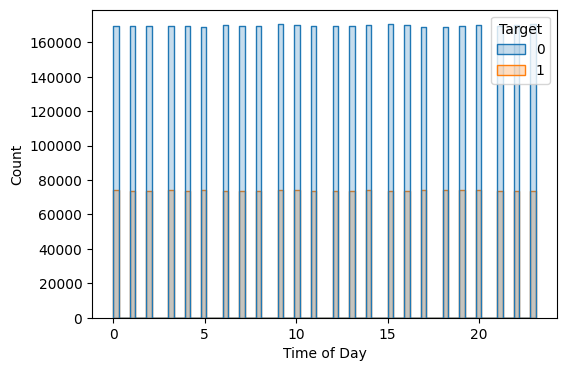

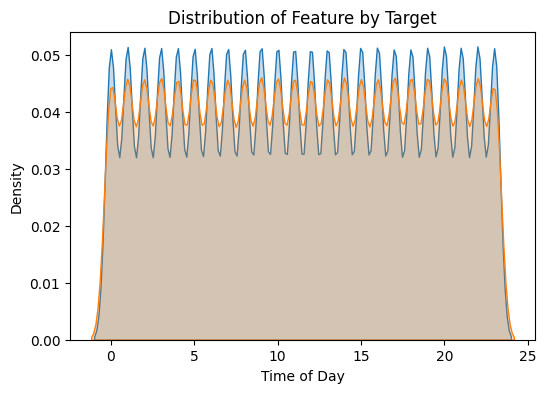

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


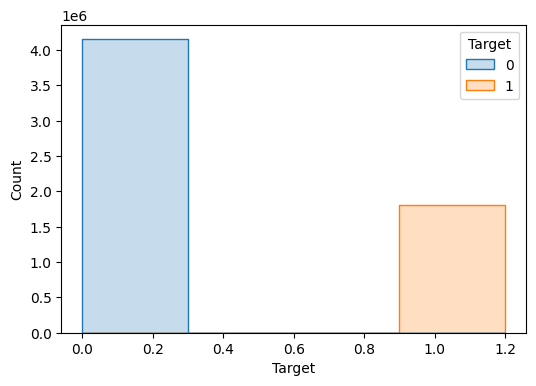

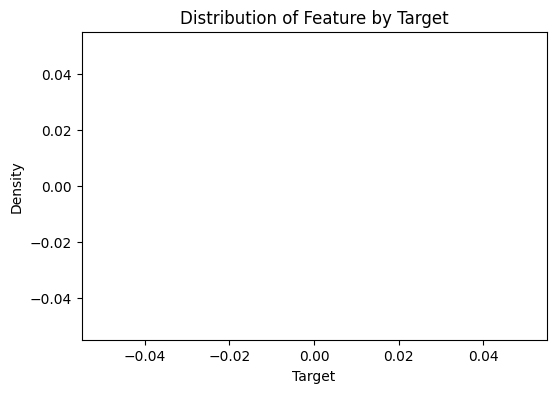

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


In [20]:
for feature_column in encoded_df.columns:
    target_column = 'Target'

    feature_target_0 = encoded_df[encoded_df[target_column] == 0][feature_column]
    feature_target_1 = encoded_df[encoded_df[target_column] == 1][feature_column]

    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature_column, hue=target_column, element='step', stat='count', binwidth=0.3)
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=encoded_df[encoded_df[target_column] == 0][feature_column], label='Target 0', shade=True)
    sns.kdeplot(data=encoded_df[encoded_df[target_column] == 1][feature_column], label='Target 1', shade=True)

    plt.title('Distribution of Feature by Target')
    plt.show()
    print(f"{'x-'*50}x")


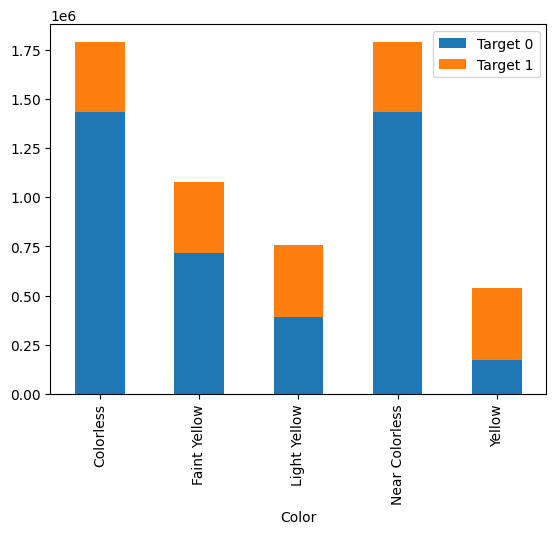

In [21]:
grouped = df.groupby(['Color', 'Target']).size().unstack()
grouped.plot.bar(stacked=True)

plt.legend(['Target 0', 'Target 1'])

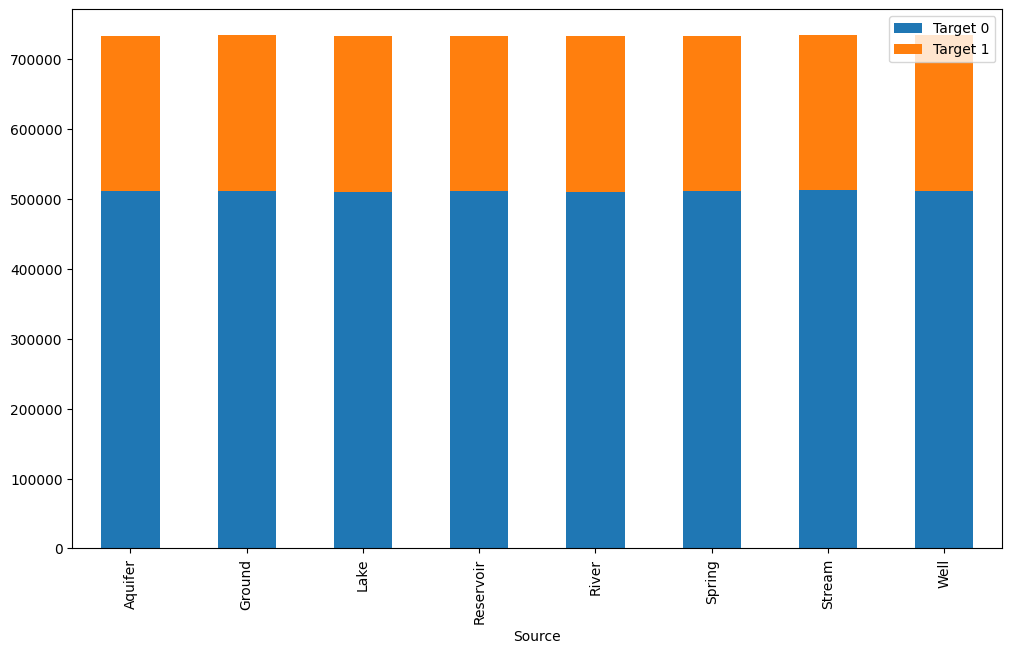

In [22]:
grouped = df.groupby(['Source', 'Target']).size().unstack()
grouped.plot.bar(stacked=True, figsize=(12, 7))

plt.legend(['Target 0', 'Target 1'])

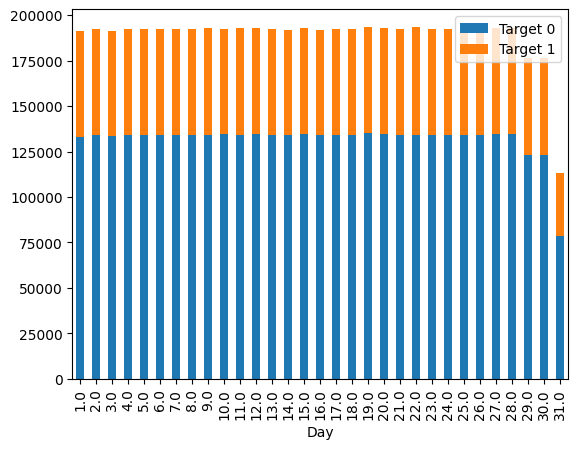

In [23]:
grouped = df.groupby(['Day', 'Target']).size().unstack()
grouped.plot.bar(stacked=True)

plt.legend(['Target 0', 'Target 1'])

## Analyzing entries for both target labels separately

In [24]:
y = df['Target'].copy()
X = df[list(df.columns)].drop('Target', axis=1).copy()

In [25]:
X

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,432.844908,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,237.028467,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,...,339.150786,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,...,521.505506,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0
5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,0.063431,...,472.383823,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0
5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,0.988735,...,718.942949,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0


In [26]:
X0 = X[y==0]
X1 = X[y==1]

In [27]:
X0.shape[0]

4151590

In [28]:
X1.shape[0]

1805252

### Analyzing the numbers of null entries

In [29]:
X0_nandict = dict(X0.isnull().sum())
for each in X0_nandict:
    X0_nandict[each] = X0_nandict[each]/X0.shape[0]*100
X0_nandict

{'pH': 1.946675851902524,
 'Iron': 0.6658171929309011,
 'Nitrate': 1.7738745878085265,
 'Chloride': 2.952073783779227,
 'Lead': 0.45175462894939045,
 'Zinc': 2.61711777897143,
 'Color': 0.09601140767754042,
 'Turbidity': 0.8366433101534593,
 'Fluoride': 3.1834068393073496,
 'Copper': 3.34907830493859,
 'Odor': 3.0114245385502905,
 'Sulfate': 3.3179336109779625,
 'Conductivity': 2.753836481926202,
 'Chlorine': 0.9697489395629144,
 'Manganese': 1.843341948506476,
 'Total Dissolved Solids': 0.029121372775249968,
 'Source': 1.4826126857420892,
 'Water Temperature': 2.81997981496246,
 'Air Temperature': 0.4989654566081911,
 'Month': 1.6031207320568748,
 'Day': 1.671407822063354,
 'Time of Day': 1.9258404611245328}

In [30]:
X1_nandict = dict(X1.isnull().sum())
for each in X1_nandict:
    X1_nandict[each] = X1_nandict[each]/X1.shape[0]*100
X1_nandict

{'pH': 1.951860460478648,
 'Iron': 0.6708758666380096,
 'Nitrate': 1.777092616432498,
 'Chloride': 2.934382568195465,
 'Lead': 0.4516820920292568,
 'Zinc': 2.6297713560212093,
 'Color': 0.09710555645416817,
 'Turbidity': 0.8353958339334342,
 'Fluoride': 3.157121554220685,
 'Copper': 3.343688305012264,
 'Odor': 2.984015528026004,
 'Sulfate': 3.305411100500096,
 'Conductivity': 2.7438274545603605,
 'Chlorine': 0.9729943520350621,
 'Manganese': 1.8310463026768562,
 'Total Dissolved Solids': 0.02553660098423932,
 'Source': 1.4795718270911762,
 'Water Temperature': 2.833897982109977,
 'Air Temperature': 0.4992654765096507,
 'Month': 1.6126834369938379,
 'Day': 1.6736167582143655,
 'Time of Day': 1.9147465284625083}

### Analyzing the numbers of unique entries (feature-wise)

In [31]:
for each in X0.columns:
    uniques = X0[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: ', end="")
        for unique in uniques:
            if pd.isna(unique):
                print(f'({unique}:{len(X0[pd.isna(X0[each])])})', end=",")
            else:
                print(f'({unique}:{len(X0[X0[each]==unique])})', end=",")
        print()

Color: (Colorless:1434156),(Faint Yellow:716909),(Light Yellow:392098),(Near Colorless:1433335),(Yellow:171106),(nan:3986),
Source: (nan:61552),(Lake:510200),(River:510525),(Ground:512034),(Spring:511012),(Stream:512317),(Aquifer:511700),(Reservoir:511358),(Well:510892),
Month: (January:346907),(November:334988),(April:336797),(June:336074),(March:347588),(September:335039),(May:346596),(July:347371),(August:346650),(October:346113),(December:346575),(February:314337),(nan:66555),
Day: (29.0:122977),(26.0:133878),(31.0:78615),(1.0:133268),(18.0:134122),(14.0:133894),(11.0:134282),(5.0:134138),(7.0:134053),(3.0:133605),(13.0:134231),(19.0:135174),(28.0:134508),(17.0:134066),(20.0:134424),(16.0:133867),(15.0:134554),(21.0:134316),(23.0:134283),(9.0:134263),(2.0:134129),(8.0:134239),(12.0:134636),(30.0:123193),(24.0:134127),(10.0:134443),(4.0:133900),(27.0:134433),(nan:69390),(25.0:134329),(6.0:133947),(22.0:134306),
Time of Day: (4.0:169418),(16.0:170292),(8.0:169279),(21.0:169305),(7.0:

In [32]:
for each in X1.columns:
    uniques = X1[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: ', end="")
        for unique in uniques:
            if pd.isna(unique):
                print(f'({unique}:{len(X1[pd.isna(X1[each])])})', end=",")
            else:
                print(f'({unique}:{len(X1[X1[each]==unique])})', end=",")
        print()

Color: (Faint Yellow:362863),(Light Yellow:366040),(Colorless:353755),(Yellow:367942),(Near Colorless:352899),(nan:1753),
Source: (Spring:221688),(River:222455),(Reservoir:221940),(Stream:222185),(Aquifer:222078),(Lake:222418),(Ground:222355),(Well:223423),(nan:26710),
Month: (March:151112),(June:145942),(April:145464),(May:151447),(October:149948),(January:150968),(February:136852),(August:150422),(July:150761),(September:146417),(November:146032),(nan:29113),(December:150774),
Day: (12.0:58341),(4.0:58329),(28.0:58409),(21.0:58174),(11.0:58517),(22.0:58975),(9.0:58441),(25.0:58347),(5.0:58467),(13.0:58415),(17.0:58327),(29.0:53627),(nan:30213),(27.0:58615),(15.0:58239),(10.0:58150),(7.0:58351),(23.0:58341),(6.0:58508),(14.0:58199),(18.0:58399),(20.0:58505),(26.0:58277),(31.0:34528),(30.0:53408),(3.0:57873),(16.0:58081),(19.0:58393),(1.0:58279),(24.0:58395),(8.0:58092),(2.0:58037),
Time of Day: (23.0:73688),(1.0:73702),(16.0:73546),(9.0:74198),(17.0:74178),(6.0:73596),(15.0:73570),(8.

In [33]:
for each in X0.columns:
    uniques = X0[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: ', end="")
        for unique in uniques:
            if pd.isna(unique):
                print(f'({unique}:{len(X0[pd.isna(X0[each])])/X0.shape[0]*100})', end=",")
            else:
                print(f'({unique}:{len(X0[X0[each]==unique])/X0.shape[0]*100})', end=",")
        print()

Color: (Colorless:34.54474068971165),(Faint Yellow:17.268299615328104),(Light Yellow:9.444526073143061),(Near Colorless:34.52496513384028),(Yellow:4.121457080299355),(nan:0.09601140767754042),
Source: (nan:1.4826126857420892),(Lake:12.289267485469422),(River:12.297095811484276),(Ground:12.333443331350157),(Spring:12.308826256928068),(Stream:12.340259996772321),(Aquifer:12.325398220922585),(Reservoir:12.317160413239266),(Well:12.305935798091816),
Month: (January:8.356003362567114),(November:8.068908538656274),(April:8.112482205612789),(June:8.095067191124365),(March:8.37240671646285),(September:8.070136983661682),(May:8.348512256749824),(July:8.367179803400624),(August:8.349812963226137),(October:8.336878159933905),(December:8.348006426453479),(February:7.571484660094084),(nan:1.6031207320568748),
Day: (29.0:2.962166302549144),(26.0:3.2247404006657687),(31.0:1.8936118451003108),(1.0:3.210047234914816),(18.0:3.2306176669661504),(14.0:3.225125795177269),(11.0:3.2344716120811543),(5.0:3.23

In [34]:
for each in X1.columns:
    uniques = X1[each].unique()
    if(len(uniques) < 35):
        print(f'{each}: ', end="")
        for unique in uniques:
            if pd.isna(unique):
                print(f'({unique}:{len(X1[pd.isna(X1[each])])/X1.shape[0]*100})', end=",")
            else:
                print(f'({unique}:{len(X1[X1[each]==unique])/X1.shape[0]*100})', end=",")
        print()

Color: (Faint Yellow:20.100407034585754),(Light Yellow:20.27639354505631),(Colorless:19.595879134879784),(Yellow:20.381752796839443),(Near Colorless:19.548461932184537),(nan:0.09710555645416817),
Source: (Spring:12.28016919521485),(River:12.322656338284073),(Reservoir:12.294128465167189),(Stream:12.307699977620853),(Aquifer:12.301772827283946),(Lake:12.320606762933927),(Ground:12.317116945445845),(Well:12.376277660958138),(nan:1.4795718270911762),
Month: (March:8.370687305705795),(June:8.084300695969317),(April:8.057822398202578),(May:8.389244271713867),(October:8.306208773068802),(January:8.362710580018746),(February:7.580769886974228),(August:8.33246549512201),(July:8.35124403684361),(September:8.110612811950908),(November:8.089286149523724),(nan:1.6126834369938379),(December:8.35196415791258),
Day: (12.0:3.23173717575164),(4.0:3.2310724486110525),(28.0:3.235503962881636),(21.0:3.222486389711796),(11.0:3.241486507146925),(22.0:3.266856926346017),(9.0:3.23727656858987),(25.0:3.2320695

## Dealing with the missing dataset values using the visualization results

In [35]:
drop_column_rows = ['Iron', 'Nitrate', 'Lead', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 
'Source', 'Air Temperature', 'Month', 'Day', 'Time of Day']

### Dropping the null value row entries for the certain identified features based on the visualizations 

In [40]:
for each in drop_column_rows:
    df = df[pd.notna(df[each])]

In [41]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
5,NaN,0.000006,1.702584,162.828458,6.102202e-23,3.742464,Near Colorless,0.504791,0.054562,0.851326,...,3.957842,2.863952e-04,365.639045,Stream,13.966842,45.444798,March,18.0,16.0,0
6,8.132455,0.055262,4.288010,94.993978,2.919909e-52,1.770221,Light Yellow,0.021703,1.111893,0.247116,...,1.706755,3.083768e-02,266.079565,Aquifer,27.920380,68.104498,September,14.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956834,7.336513,0.000799,3.807672,89.956213,4.258296e-34,3.027267,Faint Yellow,0.010288,0.745372,0.186357,...,2.553024,1.428103e-02,1.634232,Lake,18.610969,82.445237,January,27.0,11.0,1
5956835,8.161283,0.000015,6.552120,309.134213,3.368973e-44,2.127818,Light Yellow,0.201469,3.419696,3.170538,...,3.180415,7.086033e-04,19.767936,Stream,26.160882,45.900772,May,26.0,4.0,1
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1


In [42]:
df.isnull().sum()

pH                         99791
Iron                           0
Nitrate                        0
Chloride                  150767
Lead                           0
Zinc                      134204
Color                          0
Turbidity                      0
Fluoride                  162625
Copper                    171443
Odor                           0
Sulfate                   169756
Conductivity              140983
Chlorine                       0
Manganese                  94119
Total Dissolved Solids         0
Source                         0
Water Temperature         144835
Air Temperature                0
Month                          0
Day                            0
Time of Day                    0
Target                         0
dtype: int64

### Filling in the null value row entries for the certain identified features based on the visualizations

In [43]:
fillna_cols = ['pH', 'Chloride', 'Zinc', 'Fluoride', 'Copper', 'Sulfate', 'Conductivity', 'Manganese', 'Water Temperature']

In [44]:
for each in fillna_cols:
    df[each].fillna(np.mean(df[each]), inplace=True)

In [45]:
df.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

In [46]:
df.shape

(5120110, 23)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5120110 entries, 1 to 5956841
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   object 
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  object 
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Month                   object 
 20  Day                     float64
 21  Time of Day             float64

## Dealing with the categorical features

In [48]:
np.unique(df.Color)

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow'], dtype=object)

In [49]:
np.unique(df.Month)

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [50]:
sourceslist = list(np.unique(df.Source))
sourceslist.sort()

In [51]:
sourceslist

['Aquifer', 'Ground', 'Lake', 'Reservoir', 'River', 'Spring', 'Stream', 'Well']

In [52]:
replacesourceslist = [each for each in range(len(sourceslist))]
replacesourceslist

[0, 1, 2, 3, 4, 5, 6, 7]

In [53]:
colors = {
    'Colorless': 0,
    'Near Colorless': 1,
    'Faint Yellow': 2,
    'Light Yellow': 3,
    'Yellow': 4,
}

In [54]:
months = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12,    
}

In [55]:
colorslist = []
replacecolorslist = []

for each in colors:
    colorslist.append(each)
    replacecolorslist.append(colors[each])
    
print(colorslist)
print(replacecolorslist)

['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow']
[0, 1, 2, 3, 4]


In [56]:
monthslist = []
replacemonthslist = []

for each in months:
    monthslist.append(each)
    replacemonthslist.append(months[each])
    
print(monthslist)
print(replacemonthslist)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [57]:
df['Color'].replace(colorslist, replacecolorslist, inplace=True)

In [58]:
df['Month'].replace(monthslist, replacemonthslist, inplace=True)

In [59]:
df['Source'].replace(sourceslist, replacesourceslist, inplace=True)

In [60]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,2,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,11,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,3,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,1,31.0,8.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,3,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,6,29.0,7.0,0
5,7.445251,0.000006,1.702584,162.828458,6.102202e-23,3.742464,1,0.504791,0.054562,0.851326,...,3.957842,2.863952e-04,365.639045,6,13.966842,45.444798,3,18.0,16.0,0
6,8.132455,0.055262,4.288010,94.993978,2.919909e-52,1.770221,3,0.021703,1.111893,0.247116,...,1.706755,3.083768e-02,266.079565,0,27.920380,68.104498,9,14.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956834,7.336513,0.000799,3.807672,89.956213,4.258296e-34,3.027267,2,0.010288,0.745372,0.186357,...,2.553024,1.428103e-02,1.634232,2,18.610969,82.445237,1,27.0,11.0,1
5956835,8.161283,0.000015,6.552120,309.134213,3.368973e-44,2.127818,3,0.201469,3.419696,3.170538,...,3.180415,7.086033e-04,19.767936,6,26.160882,45.900772,5,26.0,4.0,1
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,2,3.824532,0.541850,0.284838,...,2.630130,9.608234e-03,545.990529,7,21.436974,70.493951,2,8.0,8.0,1
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,1,1.181166,2.747241,1.367155,...,3.555576,1.875424e-11,514.136530,1,19.064632,67.052475,9,8.0,6.0,1


In [61]:
df['Day'] = df['Day'].astype(int)

In [62]:
df['Time of Day'] = df['Time of Day'].astype(int)

In [63]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,2,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,11,26,16,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,3,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,1,31,8,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,3,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,6,29,7,0
5,7.445251,0.000006,1.702584,162.828458,6.102202e-23,3.742464,1,0.504791,0.054562,0.851326,...,3.957842,2.863952e-04,365.639045,6,13.966842,45.444798,3,18,16,0
6,8.132455,0.055262,4.288010,94.993978,2.919909e-52,1.770221,3,0.021703,1.111893,0.247116,...,1.706755,3.083768e-02,266.079565,0,27.920380,68.104498,9,14,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956834,7.336513,0.000799,3.807672,89.956213,4.258296e-34,3.027267,2,0.010288,0.745372,0.186357,...,2.553024,1.428103e-02,1.634232,2,18.610969,82.445237,1,27,11,1
5956835,8.161283,0.000015,6.552120,309.134213,3.368973e-44,2.127818,3,0.201469,3.419696,3.170538,...,3.180415,7.086033e-04,19.767936,6,26.160882,45.900772,5,26,4,1
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,2,3.824532,0.541850,0.284838,...,2.630130,9.608234e-03,545.990529,7,21.436974,70.493951,2,8,8,1
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,1,1.181166,2.747241,1.367155,...,3.555576,1.875424e-11,514.136530,1,19.064632,67.052475,9,8,6,1


### Plotting the distribution for the date-time based features w.r.t. the target labels

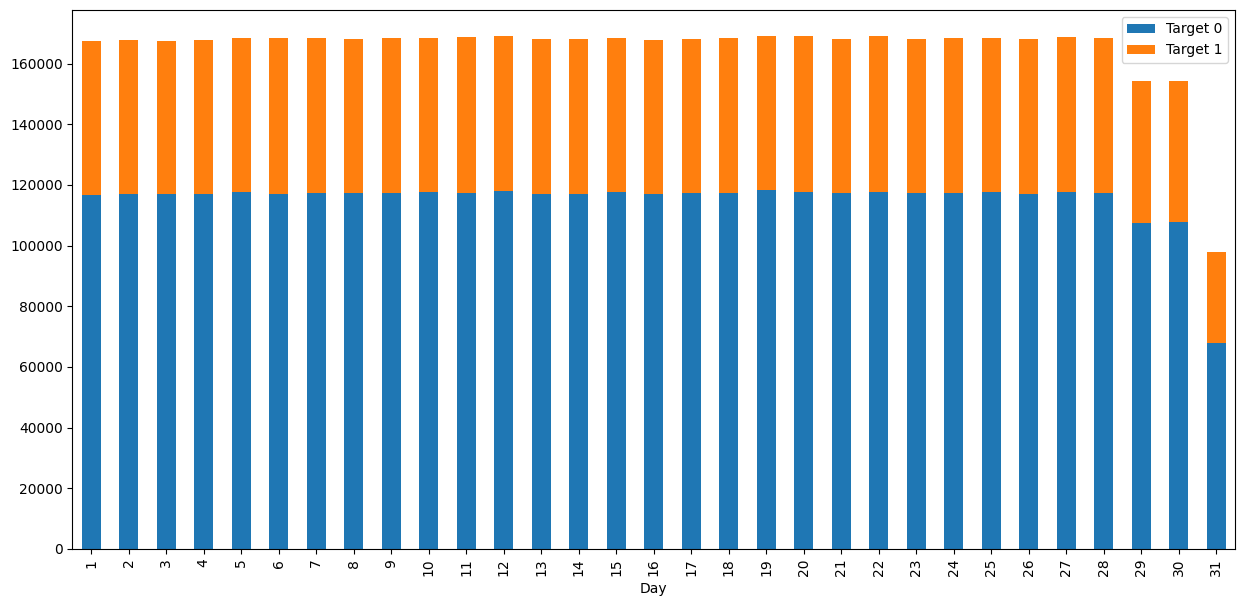

In [64]:
grouped = df.groupby(['Day', 'Target']).size().unstack()
grouped.plot.bar(stacked=True, figsize=(15,7))

plt.legend(['Target 0', 'Target 1'])
plt.show()

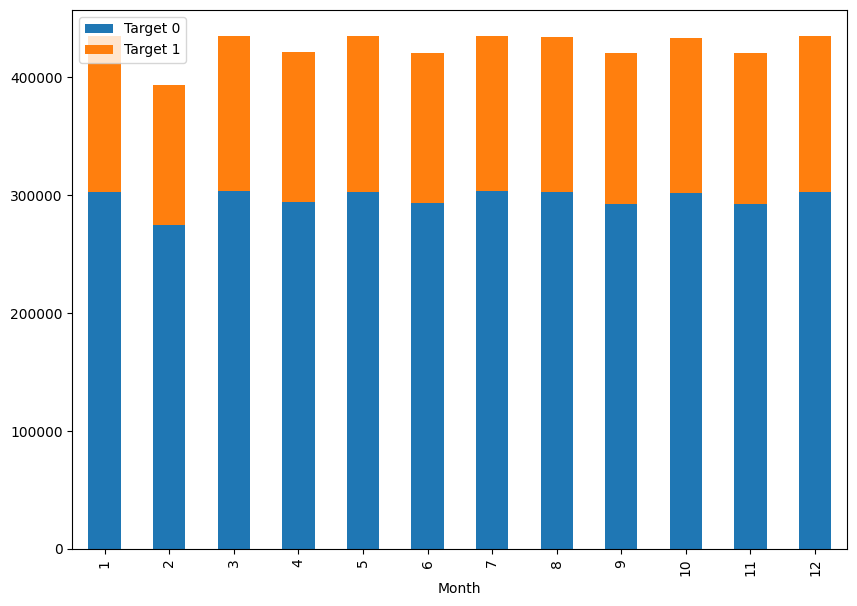

In [65]:
grouped = df.groupby(['Month', 'Target']).size().unstack()
grouped.plot.bar(stacked=True, figsize=(10,7))

plt.legend(['Target 0', 'Target 1'])
plt.show()

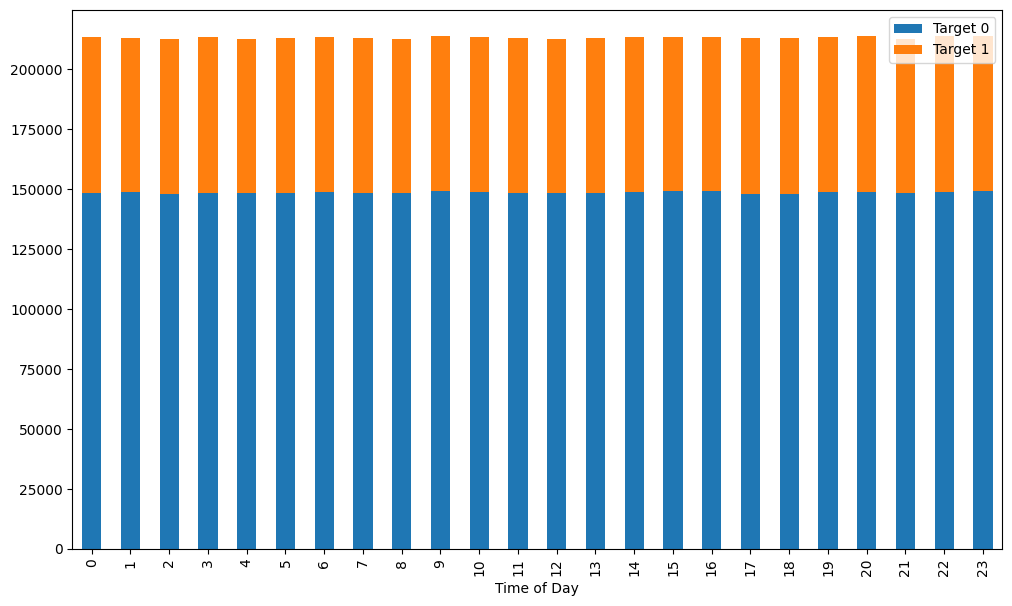

In [66]:
grouped = df.groupby(['Time of Day', 'Target']).size().unstack()
grouped.plot.bar(stacked=True, figsize=(12,7))

plt.legend(['Target 0', 'Target 1'])
plt.show()

### Dropping the unimportant feature columns based on the visualizations

In [67]:
df = df.drop(['Month', 'Day', 'Time of Day'], axis=1)

## Dataset after applying preprocessing based on the data analysis and visualizations

In [68]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,2,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,3,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,3,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,0
5,7.445251,0.000006,1.702584,162.828458,6.102202e-23,3.742464,1,0.504791,0.054562,0.851326,1.270483,40.853403,273.359662,3.957842,2.863952e-04,365.639045,6,13.966842,45.444798,0
6,8.132455,0.055262,4.288010,94.993978,2.919909e-52,1.770221,3,0.021703,1.111893,0.247116,0.426404,146.073521,265.530096,1.706755,3.083768e-02,266.079565,0,27.920380,68.104498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956834,7.336513,0.000799,3.807672,89.956213,4.258296e-34,3.027267,2,0.010288,0.745372,0.186357,2.585437,145.362834,533.374053,2.553024,1.428103e-02,1.634232,2,18.610969,82.445237,1
5956835,8.161283,0.000015,6.552120,309.134213,3.368973e-44,2.127818,3,0.201469,3.419696,3.170538,1.931928,43.043399,366.349236,3.180415,7.086033e-04,19.767936,6,26.160882,45.900772,1
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,2,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,7,21.436974,70.493951,1
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,1,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,1,19.064632,67.052475,1
